# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/Users/maxkleinegger/miniconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Load the data

In [2]:
df = pd.read_csv('runs_results.csv')

In [ ]:
summary_stats = df.groupby(['gil', 'command']).agg(
    mean_cycles=('cycles', 'mean'),
    median_cycles=('cycles', 'median'),
    std_cycles=('cycles', 'std'),
    min_cycles=('cycles', 'min'),
    max_cycles=('cycles', 'max'),
    mean_instructions=('instructions', 'mean'),
    median_instructions=('instructions', 'median'),
    std_instructions=('instructions', 'std'),
    min_instructions=('instructions', 'min'),
    max_instructions=('instructions', 'max'),
    mean_task_clock=('task-clock', 'mean'),
    median_task_clock=('task-clock', 'median'),
    std_task_clock=('task-clock', 'std'),
    min_task_clock=('task-clock', 'min'),
    max_task_clock=('task-clock', 'max'),
    mean_time_elapsed=('time_elapsed', 'mean'),
    median_time_elapsed=('time_elapsed', 'median'),
    std_time_elapsed=('time_elapsed', 'std'),
    min_time_elapsed=('time_elapsed', 'min'),
    max_time_elapsed=('time_elapsed', 'max'),
    mean_user_time=('user_time', 'mean'),
    median_user_time=('user_time', 'median'),
    std_user_time=('user_time', 'std'),
    min_user_time=('user_time', 'min'),
    max_user_time=('user_time', 'max'),
    mean_sys_time=('sys_time', 'mean'),
    median_sys_time=('sys_time', 'median'),
    std_sys_time=('sys_time', 'std'),
    min_sys_time=('sys_time', 'min'),
    max_sys_time=('sys_time', 'max')
).reset_index()

summary_stats.sort_values(by=['command', 'gil'], inplace=True)

,command,gil,mean_cycles
2,./src/0_plain/improved.py 7e240de74fb1ed08fa08...,PYTHON_GIL=1,1.317006e+09
3,./src/0_plain/itertools.py 7e240de74fb1ed08fa0...,PYTHON_GIL=1,1.330438e+09
4,./src/0_plain/lib.py 7e240de74fb1ed08fa08d3806...,PYTHON_GIL=1,8.599673e+07
5,./src/0_plain/plain.py 7e240de74fb1ed08fa08d38...,PYTHON_GIL=1,1.659563e+09
6,./src/1_multiprocessing/imap.py 7e240de74fb1ed...,PYTHON_GIL=1,4.830056e+09
7,./src/1_multiprocessing/imap_unordered.py 7e24...,PYTHON_GIL=1,4.967309e+09
8,./src/1_multiprocessing/map.py 7e240de74fb1ed0...,PYTHON_GIL=1,1.635808e+11
9,./src/1_multiprocessing/map_async.py 7e240de74...,PYTHON_GIL=1,1.637686e+11
0,./src/2_multithreading/executor.py 7e240de74fb...,PYTHON_GIL=0,1.684222e+11
10,./src/2_multithreading/executor.py 7e240de74fb...,PYTHON_GIL=1,8.307154e+10


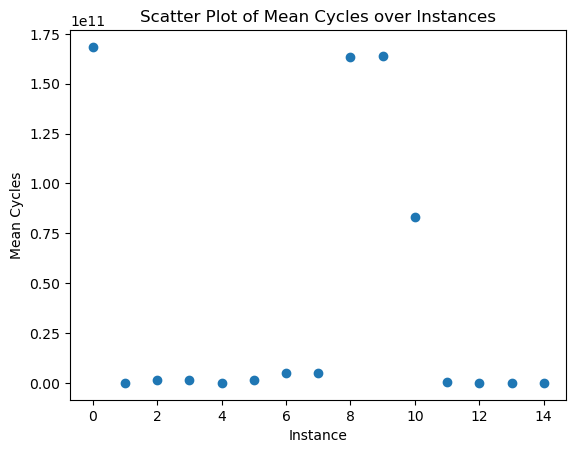

In [14]:
# Scatter plot of mean_cycles
plt.scatter(summary_stats.index, summary_stats['mean_cycles'])
plt.xlabel('Instance')
plt.ylabel('Mean Cycles')
plt.title('Scatter Plot of Mean Cycles over Instances')
plt.show()

/var/folders/5s/7wthnl510p9_gg2ytrfvxy180000gn/T/ipykernel_29343/3725811888.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

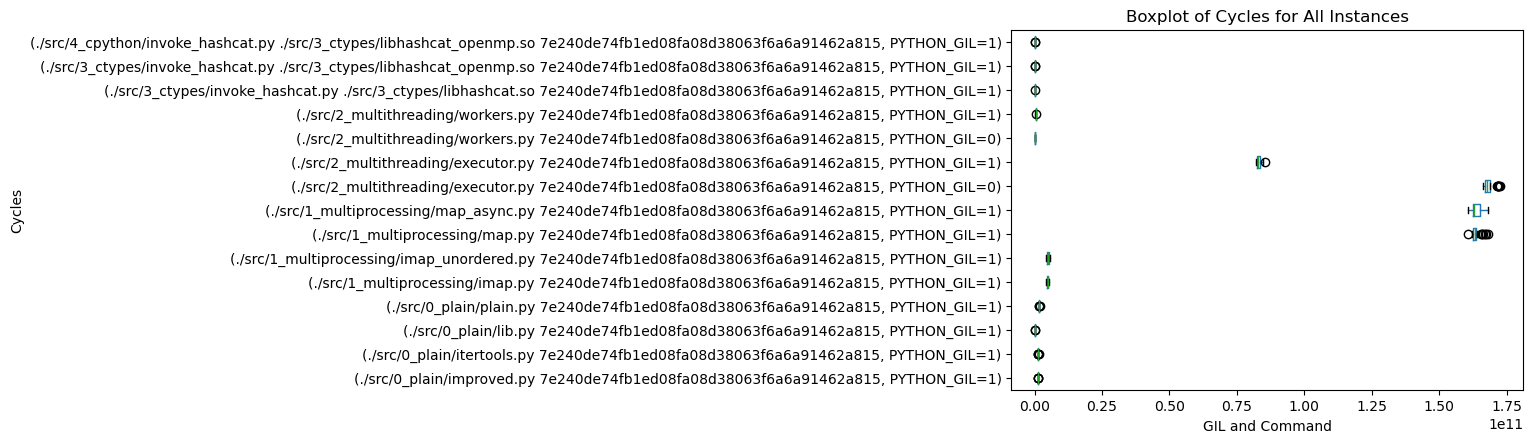

In [15]:
# Create a boxplot for the 'cycles' column, grouped by 'gil' and 'command'
plt.figure(figsize=(12, 6))
df.boxplot(column='cycles', by=['command', 'gil'], grid=False, vert=False)
plt.title("Boxplot of Cycles for All Instances")
plt.suptitle("")  # Suppress default subtitle
plt.xlabel("GIL and Command")
#plt.yticks(list(range(1,len(summary_stats))))  # Remove x-labels
plt.ylabel("Cycles")
plt.tight_layout()
plt.show()